In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
matches = pd.read_csv(r'C:\Users\AVISHEK\Documents\matches.csv')
delivery = pd.read_csv(r'C:\Users\AVISHEK\Documents\deliveries.csv')

In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [10]:
matches.head

<bound method NDFrame.head of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
5        6    2017      Hyderabad  2017-04-09                Gujarat Lions   
6        7    2017         Mumbai  2017-04-09        Kolkata Knight Riders   
7        8    2017         Indore  2017-04-10  Royal Challengers Bangalore   
8        9    2017           Pune  2017-04-11             Delhi Daredevils   
9       10    2017         Mumbai  2017-04-12          Sunrisers Hyderabad   
10      11    2017        Kolkata  2017-04-13              Kings XI Punjab   
11      12    2017      Bangalore 

In [11]:
print(len(matches) , len(delivery))


756 179078


# 1 . Who will win ? MI or DC

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

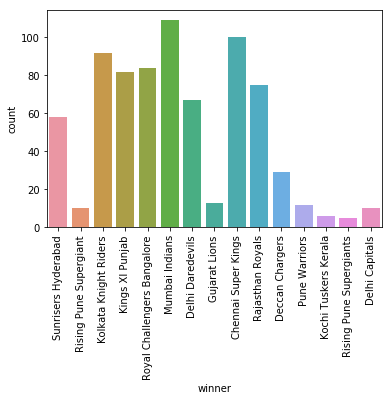

In [12]:
sb.countplot(matches['winner'])
plt.xticks(rotation = 90)

In [14]:
team_1 = 'Mumbai Indians'
team_2 = 'Delhi Capitals'

In [16]:
matches = matches[matches['result']=='normal']
matches1 = matches.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)

matches1.dropna(inplace=True)

In [17]:
matches1.head()

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0
1,2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10
3,4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6
4,5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0


In [18]:
matches1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [19]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)

In [20]:
for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(lambda x: x if x==team_1 else (x if x==team_2 else "Others"))

In [21]:
matches1.head()

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
0,1,Others,Others,Others,field,Others,35,0
1,2,Mumbai Indians,Others,Others,field,Others,0,7
2,3,Others,Others,Others,field,Others,0,10
3,4,Others,Others,Others,field,Others,0,6
4,5,Others,Delhi Capitals,Others,bat,Others,15,0


In [22]:
today_match = pd.concat([matches1[(matches1.team1 == team_1) & (matches1.team2 == team_2)], matches1[(matches1.team1 == team_2) & (matches1.team2 == team_1)]])
today_match.head()

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
23,24,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,14,0
43,44,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,146,0
81,82,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,29,0
108,109,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,0,5
149,150,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,Delhi Capitals,0,7


Text(0.5, 1.0, 'Percentage of Winning')

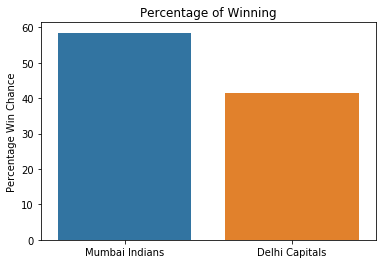

In [24]:
wins = pd.DataFrame(matches1['winner'].value_counts()[1:])
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sb.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

# The above plot suggest that Mumbai Indians may win the match

# 2.How many wickets will Kagiso Rabada take in this match

In [36]:
kr = 'K Rabada'
kr_matches = delivery[(delivery.batting_team==team_1) & (delivery.bowler==kr)]
kr_matches.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Daredevils,1,1,PA Patel,JC Buttler,K Rabada,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,1,Mumbai Indians,Delhi Daredevils,1,2,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Daredevils,1,3,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,1,Mumbai Indians,Delhi Daredevils,1,4,PA Patel,JC Buttler,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,1,Mumbai Indians,Delhi Daredevils,1,5,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [37]:
kr_matches = delivery[delivery['bowler']==kr].fillna(0)
kr_matches['player_dismissed'] = kr_matches['player_dismissed'].apply(lambda x: 0 if x==0 else 1)
median_wc_kr = kr_matches.groupby('match_id').sum()['player_dismissed'].median()
print('Generally, K Rabada takes {} wickets in an IPL match'.format(median_wc_kr))

Generally, K Rabada takes 2.0 wickets in an IPL match


Text(0.5, 1.0, 'Wickets taken by Rabada againt MI per match')

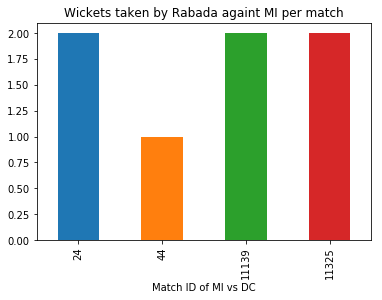

In [38]:
kr_vs_mi = delivery[(delivery['bowler']==kr) & (delivery['batting_team']==team_1)].fillna(0)
kr_vs_mi['player_dismissed'] = kr_vs_mi['player_dismissed'].apply(lambda x: 0 if x==0 else 1)
kr_vs_mi.groupby('match_id').sum()['player_dismissed'].plot(kind='bar')
plt.xlabel('Match ID of MI vs DC')
plt.title("Wickets taken by Rabada againt MI per match")

# 3. How many runs will be scored by Hardik Pandya ?

In [42]:
hp = 'HH Pandya'
hp_matches = delivery[(delivery.batting_team==team_1) & (delivery.batsman==hp)]
hp_matches.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
344,2,1,Mumbai Indians,Rising Pune Supergiant,16,4,HH Pandya,KA Pollard,A Zampa,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
345,2,1,Mumbai Indians,Rising Pune Supergiant,16,5,HH Pandya,KA Pollard,A Zampa,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
348,2,1,Mumbai Indians,Rising Pune Supergiant,17,2,HH Pandya,KA Pollard,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
350,2,1,Mumbai Indians,Rising Pune Supergiant,17,4,HH Pandya,KA Pollard,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
353,2,1,Mumbai Indians,Rising Pune Supergiant,18,1,HH Pandya,KA Pollard,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# Hardik Pandya vs Delhi Capitals

Text(0.5, 1.0, 'Hardik Pandya score against all DC matches')

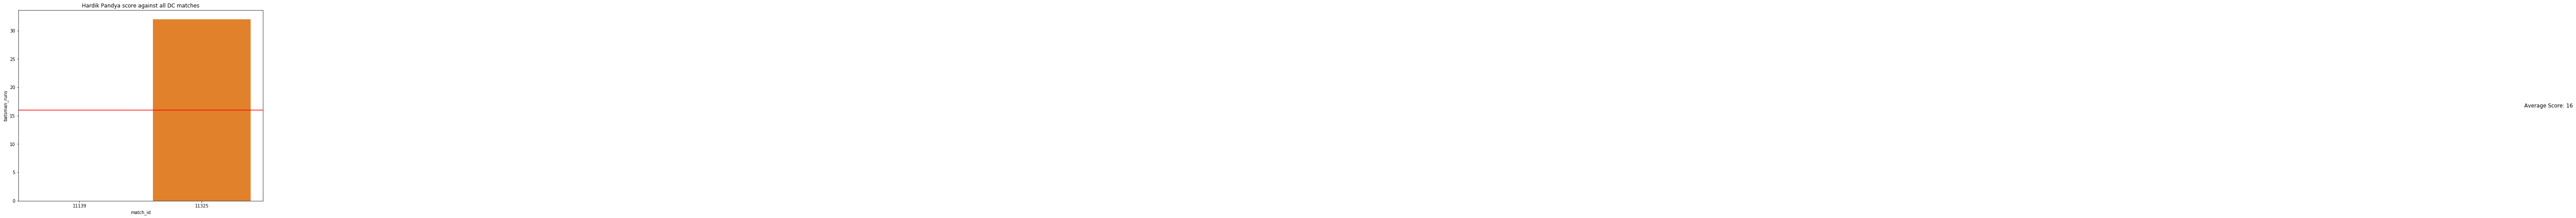

In [47]:
hp_vs_dc = hp_matches[hp_matches['bowling_team']==team_2].groupby('match_id').sum().reset_index()
plt.figure(figsize=(10,8))
sb.barplot(x='match_id', y='batsman_runs', data=hp_vs_dc)
plt.axhline(y=np.mean(hp_vs_dc['batsman_runs']), color='red')
plt.text(x=20, y=np.mean(hp_vs_dc['batsman_runs'])+0.5, fontsize=12, s='Average Score: {}'.format(round(np.mean(hp_vs_dc['batsman_runs']))))
plt.title('Hardik Pandya score against all DC matches')

# Hardik Pandya may score between 15-20 runs today

# 4. How many No-Balls will bowled in todays match

In [48]:
md_no_balls_mi = round(np.median(delivery[delivery['bowling_team']==team_1].groupby('match_id').sum()['noball_runs']))
md_no_balls_dc = round(np.median(delivery[delivery['bowling_team']==team_2].groupby('match_id').sum()['noball_runs']))
print("Median No-Balls by DC:", md_no_balls_dc)
print("Median No-Balls by MI:", md_no_balls_mi)
print("Total No-Balls in todays match:", (md_no_balls_dc+md_no_balls_mi))

Median No-Balls by DC: 0.0
Median No-Balls by MI: 0.0
Total No-Balls in todays match: 0.0


# 5. How many runs will be scored in total by both teams in today's match ?

In [49]:
dc_matches = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()
mi_matches = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()

In [52]:
average_runs_dc = dc_matches[dc_matches['total_runs']>100]['total_runs'].mean()
average_runs_mi = mi_matches[mi_matches['total_runs']>100]['total_runs'].mean()
print("Total predicted runs scored totaly in today's match = ", round(average_runs_mi+average_runs_dc))
print("This data was used neglecting the extremes. So, for rough estimation, the predicted runs can be more than 336.")

Total predicted runs scored totaly in today's match =  337
This data was used neglecting the extremes. So, for rough estimation, the predicted runs can be more than 336.


# Answers :Prediction for dream 11 IPL FINALS 2020
    1. MI will win
    2. K.Rabada can take 2 wickets
    3. H.Pandya can score between 15-20 runs
    4. No- Balls may not be bowled todays
    5. Total both teams can score 337 runs